In [50]:
import os
import pandas as pd

project_root = r"C:\Users\Diya\OneDrive\Desktop\quant-trading-system"
features_path = os.path.join(project_root, "data", "features", "nifty_features_spot_5min.csv")

df = pd.read_csv(features_path, parse_dates=["Date"])
df.head()


,Date,open,high,low,close,EMA_50,EMA_200,EMA_5,EMA_15,returns
0,2025-10-27 09:15:00+05:30,25851.949219,25877.599609,25828.099609,25861.400391,25861.400391,25861.400391,25861.400391,25861.400391,0.000000
1,2025-10-27 09:20:00+05:30,25862.849609,25882.900391,25862.849609,25880.949219,25862.167011,25861.594906,25867.916667,25863.843994,0.000756
2,2025-10-27 09:25:00+05:30,25880.099609,25891.000000,25867.250000,25889.050781,25863.221277,25861.868099,25874.961372,25866.994843,0.000313
3,2025-10-27 09:30:00+05:30,25889.150391,25899.250000,25880.949219,25896.550781,25864.528316,25862.213200,25882.157841,25870.689335,0.000290
4,2025-10-27 09:35:00+05:30,25897.050781,25927.000000,25895.949219,25921.500000,25866.762500,25862.803119,25895.271894,25877.040668,0.000963


In [52]:
df["regime_label"] = 0

df.loc[df["EMA_50"] > df["EMA_200"], "regime_label"] = 1     # Bull
df.loc[df["EMA_50"] < df["EMA_200"], "regime_label"] = -1    # Bear


In [54]:
from hmmlearn.hmm import GaussianHMM
import numpy as np

# Convert to numpy
X = hmm_features.values

# Train HMM with 3 states
hmm = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000, random_state=42)
hmm.fit(X)

# Predict regimes
regimes = hmm.predict(X)

# Add regimes to dataframe
df = df.loc[hmm_features.index]
df["regime"] = regimes

df.head()


Model is not converging.  Current: 437492.5948543314 is not greater than 437496.21443314257. Delta is -3.619578811165411


,Date,open,high,low,close,EMA_50,EMA_200,EMA_5,EMA_15,returns,regime_label,regime
19,2025-10-27 10:50:00+05:30,25957.500000,25966.000000,25949.550781,25955.800781,25907.172533,25875.691496,25959.054801,25947.542106,-0.000040,1,2
20,2025-10-27 10:55:00+05:30,25955.300781,25967.800781,25952.150391,25966.449219,25909.497109,25876.594558,25961.519607,25949.905495,0.000410,1,2
21,2025-10-27 11:00:00+05:30,25966.550781,25979.400391,25960.449219,25967.699219,25911.779544,25877.501072,25963.579477,25952.129711,0.000048,1,2
22,2025-10-27 11:05:00+05:30,25968.900391,25976.050781,25960.300781,25970.699219,25914.090120,25878.428416,25965.952724,25954.450899,0.000116,1,2
23,2025-10-27 11:10:00+05:30,25973.099609,25981.300781,25969.750000,25976.300781,25916.529754,25879.402271,25969.402077,25957.182135,0.000216,1,2


In [55]:
regime_path = os.path.join(project_root, "data", "regime")
os.makedirs(regime_path, exist_ok=True)

df.to_csv(os.path.join(regime_path, "nifty_regime_spot_5min.csv"), index=False)
print("✅ Regime file saved successfully")


✅ Regime file saved successfully


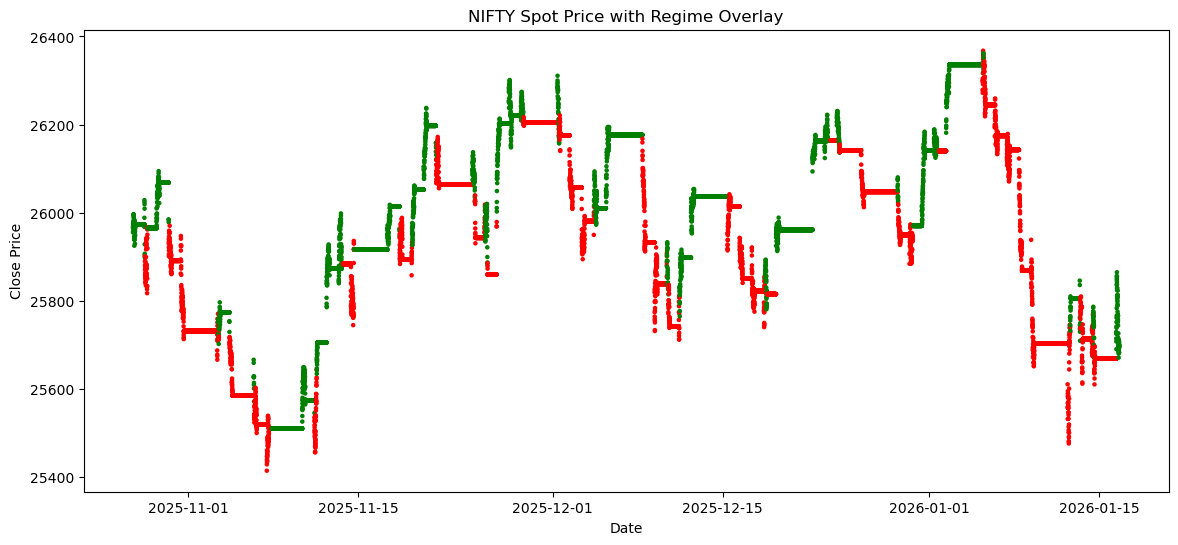

In [57]:
plt.figure(figsize=(14,6))
colors = {-1:"red", 0:"gray", 1:"green"}

plt.scatter(df["Date"], df["close"], c=df["regime_label"].map(colors), s=5)
plt.title("NIFTY Spot Price with Regime Overlay")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


In [60]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM

# Load features
import os
project_root = r"C:\Users\Diya\OneDrive\Desktop\quant-trading-system"
features_path = os.path.join(project_root, "data", "features", "nifty_features_spot_5min.csv")
df = pd.read_csv(features_path, parse_dates=["Date"])

# Use only required features for HMM
features = ["EMA_5", "EMA_15", "returns"]   # use basic features since only spot data

X = df[features].fillna(0).values

# Train HMM
train_size = int(0.7 * len(X))
model = GaussianHMM(n_components=3, covariance_type="diag", n_iter=1000, random_state=42)
model.fit(X[:train_size])

# Predict regimes
regimes = model.predict(X)

# Map states to -1,0,+1 based on mean returns
state_returns = []
for s in range(3):
    state_returns.append(df[regimes == s]["returns"].mean())

# Sort states
order = np.argsort(state_returns)

# Map to labels
mapping = {order[0]: -1, order[1]: 0, order[2]: 1}
df["regime_label"] = [mapping[s] for s in regimes]

# Save
output_path = os.path.join(project_root, "data", "features")
df.to_csv(os.path.join(output_path, "nifty_features_spot_5min.csv"), index=False)

print("✅ Regime labels added successfully!")
print(df[["Date","close","regime_label"]].head())


✅ Regime labels added successfully!
                       Date         close  regime_label
0 2025-10-27 09:15:00+05:30  25861.400391             0
1 2025-10-27 09:20:00+05:30  25880.949219            -1
2 2025-10-27 09:25:00+05:30  25889.050781             0
3 2025-10-27 09:30:00+05:30  25896.550781            -1
4 2025-10-27 09:35:00+05:30  25921.500000             0
